In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from simtree import SIMTreeRegressor, SIMTreeClassifier
from simtree import GLMTreeRegressor, GLMTreeClassifier
from rpy2.robjects import numpy2ri, pandas2ri

numpy2ri.activate()
pandas2ri.activate()

## Boston housing Dataset

In [26]:
boston = pd.read_csv("boston_housing.csv")
X = boston.drop("medv", axis=1)
Y = boston["medv"]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)

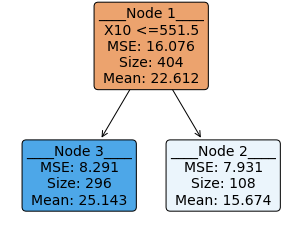

(8.194385545886512, 29.54372278496894)

In [27]:
model = SIMTreeRegressor(max_depth=1, min_samples_leaf=50, knot_num=30,
                        n_split_grid=20, n_screen_grid=5, n_feature_search=10,
                        reg_lambda=np.logspace(-5, 5, 100).tolist(),
                        reg_gamma=[1e-3, 1e-5, 1e-7])
model.fit(train_x, train_y)
model.plot_tree()
pred_train = model.predict(train_x).reshape([-1, 1])
pred_test = model.predict(test_x).reshape([-1, 1])
np.mean((train_y - pred_train.ravel()) ** 2), np.mean((test_y - pred_test.ravel()) ** 2)

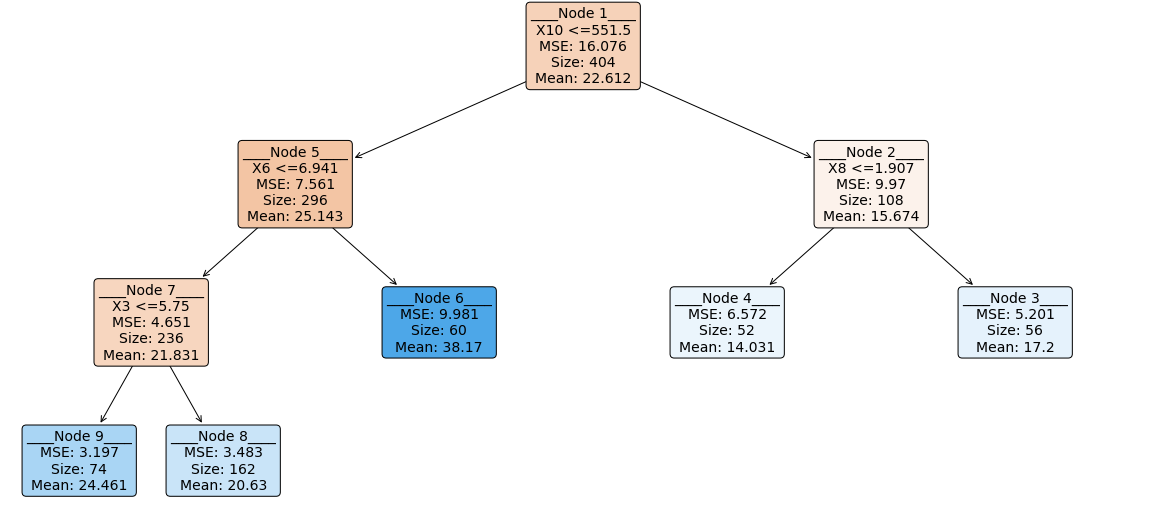

(5.031383060054709, 18.748879063513762)

In [25]:
model = SIMTreeRegressor(max_depth=3, min_samples_leaf=50, knot_num=30,
                        n_split_grid=20, n_screen_grid=5, n_feature_search=10,
                        reg_lambda=np.logspace(-5, 5, 100).tolist(),
                        reg_gamma=[1e-3, 1e-5, 1e-7])
model.fit(train_x, train_y)
model.plot_tree()
pred_train = model.predict(train_x).reshape([-1, 1])
pred_test = model.predict(test_x).reshape([-1, 1])
np.mean((train_y - pred_train.ravel()) ** 2), np.mean((test_y - pred_test.ravel()) ** 2)

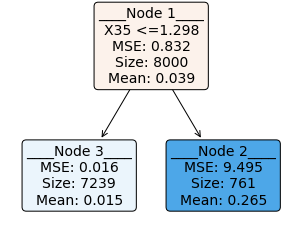

(0.9581023802363653, 0.7369305463429694)

In [22]:
simulation = pd.read_csv("simulation_data.csv")
X_2 = simulation.drop(["Binary", "y"], axis=1)
Y_2 = simulation["y"]
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(X, Y, test_size=0.2, random_state=0)

model_2 = SIMTreeRegressor(max_depth=1, min_samples_leaf=50, knot_num=30,
                        n_split_grid=20, n_screen_grid=5, n_feature_search=10,
                        reg_lambda=np.logspace(-5, 5, 100).tolist(),
                        reg_gamma=[1e-3, 1e-5, 1e-7])
model_2.fit(train_x_2, train_y_2)
model_2.plot_tree()
pred_train_2 = model_2.predict(train_x_2).reshape([-1, 1])
pred_test_2 = model_2.predict(test_x_2).reshape([-1, 1])
np.mean((train_y_2 - pred_train_2.ravel()) ** 2) ** 0.5, np.mean((test_y_2 - pred_test_2.ravel()) ** 2) ** 0.5

### Result from Hybrid Tree

<img src="1.png"
     style="float: left; margin-right: 10px;" />

## California housing Dataset

In [15]:
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
train_x, test_x, train_y, test_y = train_test_split(cal_housing.data, cal_housing.target, test_size=0.2, random_state=0)

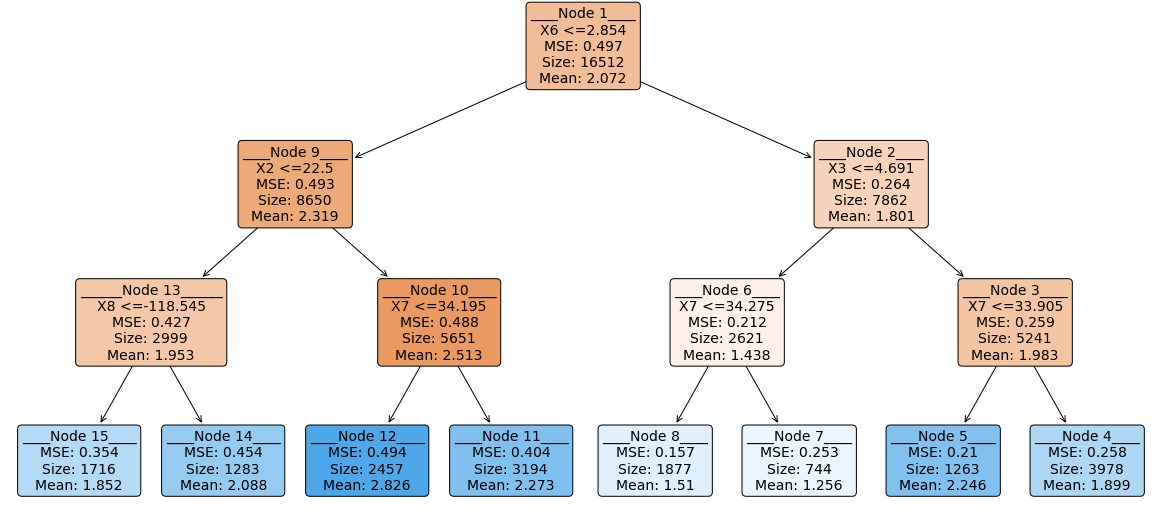

(0.575560972973471, 0.5827489675931805)

In [16]:
clf = SIMTreeRegressor(max_depth=3, min_samples_leaf=50, knot_num=30,
                        n_split_grid=20, n_screen_grid=5, n_feature_search=10)
clf.fit(train_x, train_y)
clf.plot_tree()
pred_train = clf.predict(train_x).reshape([-1, 1])
pred_test = clf.predict(test_x).reshape([-1, 1])
np.mean((train_y - pred_train.ravel()) ** 2) ** 0.5, np.mean((test_y - pred_test.ravel()) ** 2) ** 0.5

## Classification Dataset

In [20]:
from sklearn.datasets import fetch_openml
magic = fetch_openml("MagicTelescope")
train_x, test_x, train_y, test_y = train_test_split(magic.data, magic.target, test_size=0.2, random_state=0)

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name magictelescope exist. Versions may be fundamentally different, returning version 1.
  warn(


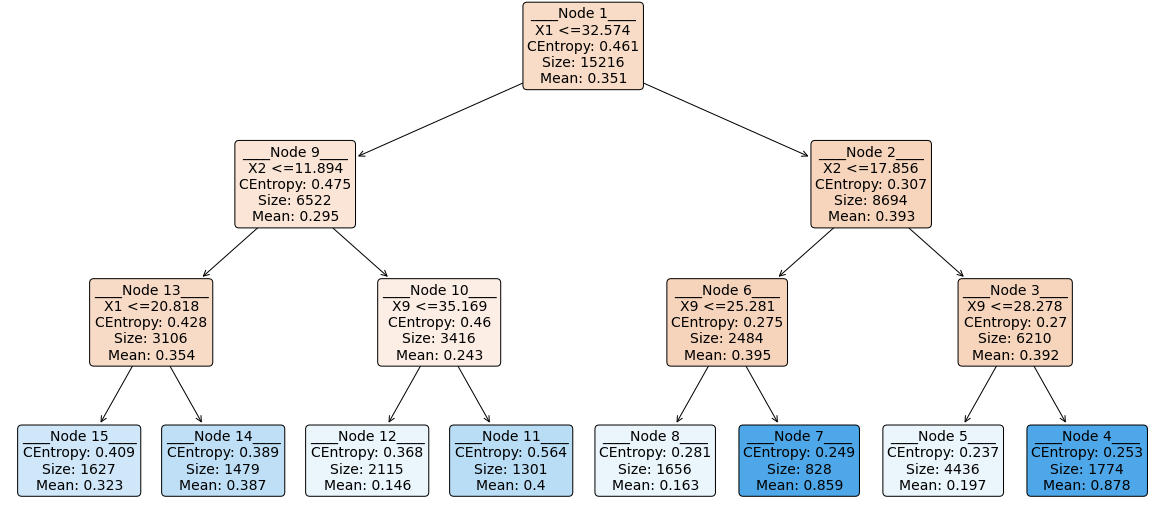

(0.9195085924742675, 0.9141706543339803)

In [21]:
clf = SIMTreeClassifier(max_depth=3, min_samples_leaf=50, knot_num=30,
                        n_split_grid=20, n_screen_grid=5, n_feature_search=10,
                        reg_lambda=np.logspace(-5, 5, 100).tolist(),
                        reg_gamma=[1e-3, 1e-5, 1e-7])
clf.fit(train_x, train_y)
clf.plot_tree()
pred_train = clf.predict_proba(train_x)[:, 1]
pred_test = clf.predict_proba(test_x)[:, 1]
roc_auc_score(train_y, pred_train.ravel()), roc_auc_score(test_y, pred_test.ravel())

In [22]:
# here we use LogisticRegressor in sklearn
# reg_lambda corresponds to parameter "C", which is inverse of regularization strength.
clf = GLMTreeClassifier(max_depth=3, min_samples_leaf=50, reg_lambda=np.logspace(-5, 5, 10).tolist(),
                        n_split_grid=20, n_screen_grid=5, n_feature_search=10)
clf.fit(train_x, train_y)
pred_train = clf.predict_proba(train_x)[:, 1]
pred_test = clf.predict_proba(test_x)[:, 1]
roc_auc_score(train_y, pred_train.ravel()), roc_auc_score(test_y, pred_test.ravel())

(0.9167124157757403, 0.9104804568798629)